# Initial Setup

In [1]:
import ipywidgets
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from stop_words import get_stop_words

pysqldf = lambda q: sqldf(q, globals())

listings = pd.read_json("data/normalised/listings.json")
listing_directors = pd.read_json("data/normalised/listing_directors.json")
listing_casts = pd.read_json("data/normalised/listing_casts.json")
listing_producer_countries = pd.read_json("data/normalised/listing_producer_countries.json")
listing_categories = pd.read_json("data/normalised/listing_categories.json")

english_stop_words = get_stop_words(language="english")

C:\Users\wyw23\AppData\Local\Temp\ipykernel_11964\2813237668.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Defining Charts (AI generated code)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def bar_chart_horizontal(data: pd.DataFrame,
                         label_name: str,
                         value_name: str,
                         sort: bool,
                         sort_desc: bool,
                         title: str | None = None,
                         limit: int = 100,
                         show_values: bool = True,
                         grouping_label: str | None = None,
                         max_value_axis: float | None = None): # New parameter
    """
    Generates a horizontal bar chart using Seaborn with left-aligned values inside the bars.
    Can be a grouped bar chart if grouping_label is provided.

    Args:
        data: A Pandas DataFrame containing the data.
        label_name: The column name for labels (y-axis).
        value_name: The column name for values (x-axis).
        sort: Boolean, whether to sort the bars/groups by value.
        sort_desc: Boolean, if sort is True, sort in descending order.
        title: The title of the chart.
        limit: Integer, max number of data rows (bars/bar segments) to display.
        show_values: Boolean, whether to display the value on each bar segment.
        grouping_label: Optional column name for creating grouped bars (hue).
        max_value_axis: Optional float to set the maximum limit for the value axis (x-axis).
    """
    df_processed = data.copy()

    if sort:
        df_processed = df_processed.sort_values(by=value_name, ascending=not sort_desc)

    df_processed = df_processed.head(limit)

    plt.figure(figsize=(12, 8 + (len(df_processed[label_name].unique()) * 0.2 if grouping_label else 0) ))
    
    y_axis_order = df_processed[label_name].unique().tolist()

    ax = sns.barplot(x=value_name,
                     y=label_name,
                     hue=grouping_label,
                     data=df_processed,
                     orient='h',
                     order=y_axis_order) # [5, 9, 12]
    
    # Set max value for x-axis if provided
    if max_value_axis is not None:
        current_xlim = ax.get_xlim()
        ax.set_xlim(left=current_xlim[0], right=max_value_axis) # [8]

    plt.title(title or f'Horizontal Bar Chart: {value_name} by {label_name}{f" grouped by {grouping_label}" if grouping_label else ""}')
    plt.xlabel(value_name)
    plt.ylabel(label_name)

    if show_values:
        # Get the current x-axis limit for text positioning logic
        # This will reflect max_value_axis if it was set
        current_axis_max_val = ax.get_xlim()[1]

        for i, bar in enumerate(ax.patches): # [11, 15, 20]
            bar_width = bar.get_width()
            value_to_display = bar_width 
            y_val = bar.get_y() + bar.get_height() / 2 # [11, 15]

            original_series_dtype = df_processed[value_name].dtype
            if isinstance(value_to_display, float):
                if pd.api.types.is_integer_dtype(original_series_dtype) and value_to_display.is_integer():
                     formatted_value = f'{int(value_to_display):,.0f}'
                else:
                     formatted_value = f'{value_to_display:,.2f}'
            else:
                formatted_value = str(value_to_display)

            min_bar_width_for_internal_text = current_axis_max_val * 0.15

            # Adjust text position if bar exceeds the explicitly set axis limit
            display_bar_width = min(bar_width, current_axis_max_val)


            if display_bar_width < min_bar_width_for_internal_text or display_bar_width == 0:
                text_x_pos = display_bar_width + (current_axis_max_val * 0.01)
                ha_align = 'left'
                text_color = 'black'
                font_weight = 'normal'
            else:
                text_x_pos = current_axis_max_val * 0.01 
                ha_align = 'left'
                text_color = 'white'
                font_weight = 'bold'
            
            # Only add text if the original bar had width and is within visible plot area
            if bar_width > 0 and bar.get_x() < current_axis_max_val :
                # Ensure text_x_pos is also within visible area for bars truncated by max_value_axis
                actual_text_x_pos = min(text_x_pos, current_axis_max_val * 0.98) if ha_align == 'left' and text_x_pos > current_axis_max_val * 0.01 else text_x_pos
                
                ax.text(actual_text_x_pos,
                        y_val,
                        formatted_value,
                        va='center',
                        ha=ha_align,
                        fontsize=8,
                        color=text_color, # [11, 15, 20]
                        fontweight=font_weight,
                        # Add clipping so text doesn't go way out if bar is truncated
                        clip_on=True if display_bar_width < min_bar_width_for_internal_text else False)


    if grouping_label:
        plt.legend(title=grouping_label)
    plt.tight_layout()
    plt.show()

def bar_chart_vertical(data: pd.DataFrame,
                       label_name: str,
                       value_name: str,
                       sort: bool,
                       sort_desc: bool,
                       title: str | None = None,
                       limit: int = 100,
                       show_values: bool = True,
                       grouping_label: str | None = None,
                       max_value_axis: float | None = None): # New parameter
    """
    Generates a vertical bar chart using Seaborn with values on top of the bars.
    Can be a grouped bar chart if grouping_label is provided.

    Args:
        data: A Pandas DataFrame containing the data.
        label_name: The column name for labels (x-axis).
        value_name: The column name for values (y-axis).
        sort: Boolean, whether to sort the bars/groups by value.
        sort_desc: Boolean, if sort is True, sort in descending order.
        title: The title of the chart.
        limit: Integer, max number of data rows (bars/bar segments) to display.
        show_values: Boolean, whether to display the value on each bar segment.
        grouping_label: Optional column name for creating grouped bars (hue).
        max_value_axis: Optional float to set the maximum limit for the value axis (y-axis).
    """
    df_processed = data.copy()

    if sort:
        df_processed = df_processed.sort_values(by=value_name, ascending=not sort_desc) # [7, 10]

    df_processed = df_processed.head(limit)
    
    x_axis_order = df_processed[label_name].unique().tolist() # [3, 7]

    plt.figure(figsize=(10 + (len(df_processed[label_name].unique())*0.5 if grouping_label else 0), 7))
    ax = sns.barplot(x=label_name,
                     y=value_name,
                     hue=grouping_label,
                     data=df_processed,
                     order=x_axis_order) # [2, 3, 6]

    # Set max value for y-axis if provided
    if max_value_axis is not None:
        current_ylim = ax.get_ylim()
        ax.set_ylim(bottom=current_ylim[0], top=max_value_axis) # [4]
    
    plt.title(title or f'Vertical Bar Chart: {value_name} by {label_name}{f" grouped by {grouping_label}" if grouping_label else ""}')
    plt.xlabel(label_name)
    plt.ylabel(value_name)
    plt.xticks(rotation=45, ha="right")

    if show_values:
        current_axis_max_val = ax.get_ylim()[1] # Reflects max_value_axis if set

        for i, bar in enumerate(ax.patches):
            bar_height = bar.get_height()
            value_to_display = bar_height # Actual value of the bar segment

            x_val = bar.get_x() + bar.get_width() / 2
            
            # Display height of the bar, capped by the axis limit for text positioning
            display_bar_height = min(bar_height, current_axis_max_val)
            
            y_val_text_anchor = display_bar_height # Anchor text based on visible bar height

            original_series_dtype = df_processed[value_name].dtype
            if isinstance(value_to_display, float): # This is the actual bar value
                if pd.api.types.is_integer_dtype(original_series_dtype) and value_to_display.is_integer():
                     formatted_value = f'{int(value_to_display):,.0f}'
                else:
                     formatted_value = f'{value_to_display:,.2f}'
            else:
                formatted_value = str(value_to_display)
            
            # Only add text if the original bar had height and is somewhat visible
            if bar_height > 0 and bar.get_y() < current_axis_max_val :
                ax.text(x_val,
                        y_val_text_anchor + (current_axis_max_val * 0.01), # Offset from (potentially capped) bar top
                        formatted_value,
                        va='bottom',
                        ha='center',
                        fontsize=8,
                        clip_on=True) # Clip text if it goes beyond plot area due to axis limits

    if grouping_label:
        plt.legend(title=grouping_label)
    plt.tight_layout()
    plt.show()

def pie_chart(data: pd.DataFrame, label_name: str, value_name: str, title: str | None = None):
    """
    Generates a pie chart using Matplotlib with values and percentages. [16]

    Args:
        data: A Pandas DataFrame containing the data.
        label_name: The column name in the DataFrame to be used for labels.
        value_name: The column name in the DataFrame to be used for values.
        title: The title of the chart.
    """
    df_chart_data = data.copy()
    if label_name in df_chart_data.columns and value_name in df_chart_data.columns:
        df_pie_data = df_chart_data.groupby(label_name, as_index=False)[value_name].sum()
    else:
        print(f"Error: Columns '{label_name}' or '{value_name}' not found for pie chart.")
        return

    chart_labels = df_pie_data[label_name]
    chart_values = df_pie_data[value_name]

    def autopct_format_with_value(pct): # [18, 21]
        total = sum(chart_values)
        val = (pct/100.) * total
        first_val_type = type(chart_values.iloc[0]) if not chart_values.empty else float

        if pd.api.types.is_float_dtype(first_val_type):
            closest_original_value = min(chart_values, key=lambda x:abs(x-val)) if not chart_values.empty else val
            val_formatted = f'{closest_original_value:,.2f}'
        elif pd.api.types.is_integer_dtype(first_val_type):
            val_formatted = f'{int(round(val)):,.0f}'
        else:
            val_formatted = str(val)
        return f'{val_formatted} ({pct:.1f}%)'

    plt.figure(figsize=(9, 9))
    wedges, texts, autotexts = plt.pie(chart_values, labels=chart_labels, autopct=autopct_format_with_value, startangle=90, pctdistance=0.80) # [1, 14, 18, 21, 23]

    for autotext in autotexts: # [21]
        autotext.set_color('white') # [21]
        autotext.set_fontsize(8) # [21]
        autotext.set_fontweight('bold')

    plt.title(title or f'Pie Chart: {value_name} by {label_name}')
    plt.axis('equal')
    plt.show()


def word_cloud_chart(data: pd.DataFrame,
                       text_column: str,
                       title: str | None = None,
                       max_words: int = 200,
                       background_color: str = 'white',
                       colormap: str | None = None,
                       width: int = 800,
                       height: int = 400,
                       font_path: str | None = None):
    """
    Generates a word cloud from a text column in a DataFrame.

    Args:
        data: Pandas DataFrame containing the text data.
        text_column: The column name with the text for the word cloud.
        title: The title of the chart.
        max_words: The maximum number of words to display.
        background_color: The background color of the word cloud image.
        colormap: Matplotlib colormap name to use for word colors (e.g., "viridis", "plasma").
                  If None, WordCloud default ("viridis") is used.
        width: Width of the generated image in pixels.
        height: Height of the generated image in pixels.
        font_path: Path to a .ttf or .otf font file for custom fonts.
    """
    df_processed = data.copy()

    if text_column not in df_processed.columns:
        print(f"Error: Text column '{text_column}' not found in DataFrame.")
        return

    # Combine all text from the specified column, handling potential NaN values
    text = " ".join(str(entry) for entry in df_processed[text_column].dropna())

    if not text.strip():
        print(f"Error: No text found in column '{text_column}' to generate a word cloud.")
        return

    stopword_set = set(english_stop_words)

    wordcloud = WordCloud(width=width, height=height,
                          background_color=background_color,
                          stopwords=stopword_set,
                          max_words=max_words,
                          colormap=colormap,
                          font_path=font_path).generate(text)

    plt.figure(figsize=(width / 100, height / 100)) # Adjust figure size based on word cloud dimensions
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if title:
        plt.title(title)
    else:
        plt.title(f'Word Cloud from {text_column}')
    plt.tight_layout(pad=0)
    plt.show()


def sample():
    # --- Basic Sample Data ---
    sample_list_of_dicts = [
        {"label": "Category A", "value": 30},
        {"label": "Category B", "value": 50000}, # Large value
        {"label": "Category C", "value": 20},
        {"label": "Category D", "value": 40000}, # Large value
        {"label": "Category E", "value": 10},
    ]
    sample_df = pd.DataFrame(sample_list_of_dicts)

    print("--- Basic Bar Charts with Max Value Axis ---")
    print("Horizontal Bar Chart with max_value_axis=30000 (some bars will be truncated)")
    bar_chart_horizontal(data=sample_df, label_name="label", value_name="value",
                         sort=True, sort_desc=True, show_values=True,
                         title="Sales by Category (Max X-Axis: 30k)",
                         max_value_axis=30000)

    print("Vertical Bar Chart with max_value_axis=35000")
    bar_chart_vertical(data=sample_df, label_name="label", value_name="value",
                       sort=False, sort_desc=False, show_values=True,
                       title="Sales by Label (Max Y-Axis: 35k)",
                       max_value_axis=35000)
    
    print("Horizontal Bar Chart (No Max Value Axis - for comparison)")
    bar_chart_horizontal(data=sample_df, label_name="label", value_name="value",
                         sort=True, sort_desc=True, show_values=True,
                         title="Sales by Category (No Max X-Axis)")


    # --- Grouped Sample Data ---
    sample_list_grouped = [
        {"product_category": "Electronics", "sales": 15000, "region": "North", "quarter": "Q1"},
        {"product_category": "Electronics", "sales": 68000, "region": "South", "quarter": "Q1"}, # Large
        {"product_category": "Electronics", "sales": 12000, "region": "North", "quarter": "Q2"},
        {"product_category": "Electronics", "sales": 20000, "region": "South", "quarter": "Q2"},
        {"product_category": "Furniture", "sales": 22000, "region": "North", "quarter": "Q1"},
        {"product_category": "Furniture", "sales": 19000, "region": "South", "quarter": "Q1"},
        {"product_category": "Furniture", "sales": 75000, "region": "North", "quarter": "Q2"}, # Large
        {"product_category": "Furniture", "sales": 17000, "region": "South", "quarter": "Q2"},
        {"product_category": "Clothing", "sales": 30000, "region": "North", "quarter": "Q1"},
        {"product_category": "Clothing", "sales": 28000, "region": "South", "quarter": "Q1"},
        {"product_category": "Clothing", "sales": 5000, "region": "West", "quarter": "Q1"},
    ]
    sample_df_grouped = pd.DataFrame(sample_list_grouped)

    print("\n--- Grouped Bar Charts with Max Value Axis ---")
    print("Grouped Horizontal Bar Chart with max_value_axis=50000")
    bar_chart_horizontal(data=sample_df_grouped,
                         label_name="product_category",
                         value_name="sales",
                         sort=True, sort_desc=True,
                         grouping_label="region",
                         show_values=True,
                         limit=12,
                         title="Sales by Category & Region (Max X-Axis: 50k)",
                         max_value_axis=50000)

    print("Grouped Vertical Bar Chart with max_value_axis=40000")
    bar_chart_vertical(data=sample_df_grouped,
                       label_name="region",
                       value_name="sales",
                       sort=False, sort_desc=False,
                       grouping_label="quarter",
                       show_values=True,
                       limit=15,
                       title="Sales by Region & Quarter (Max Y-Axis: 40k)",
                       max_value_axis=40000)
    
    # --- Pie Chart Example (uses aggregation) ---
    print("\n--- Pie Chart ---")
    print("Displaying Pie Chart (Total Sales by Product Category)")
    pie_chart(data=sample_df_grouped, label_name="product_category", value_name="sales", title="Total Sales Share by Category")


# Total listings by type over all time, multi platforms

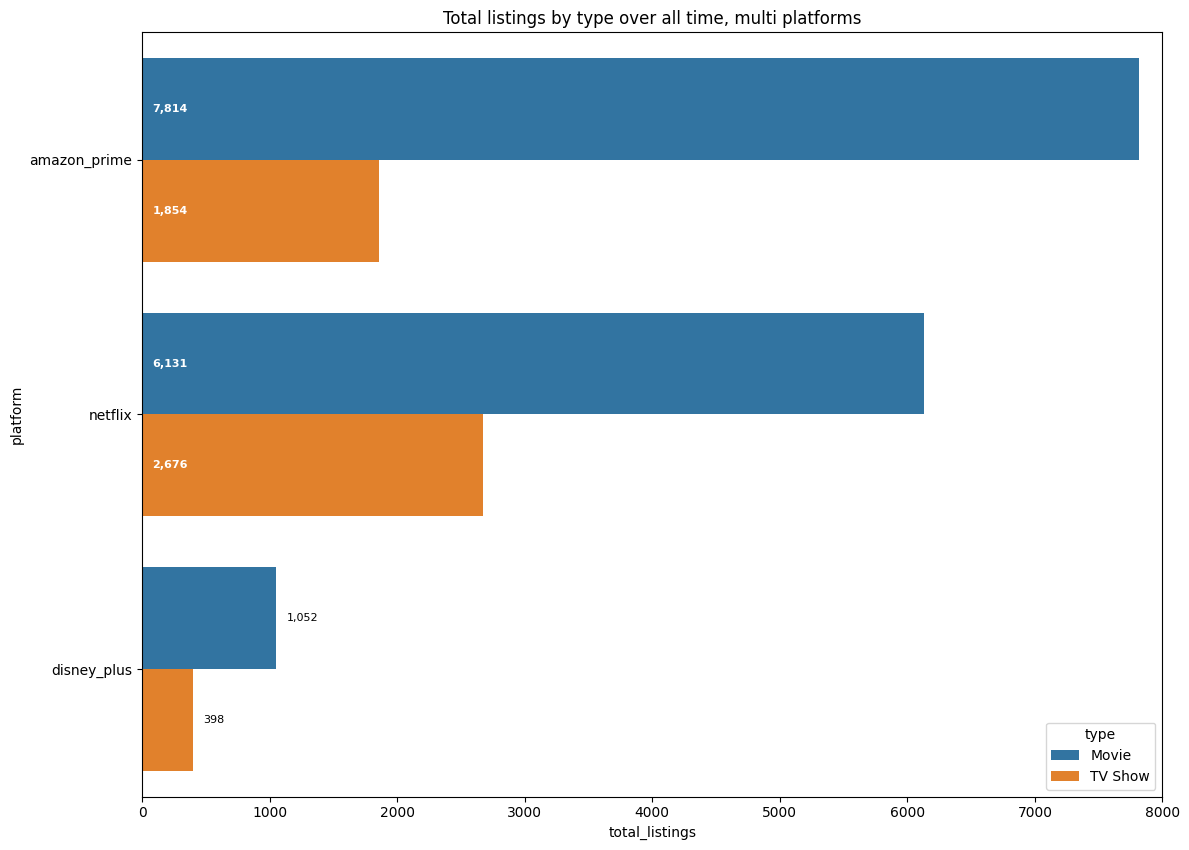

In [3]:
def total_listings_by_type():
    data = sqldf(
        """
SELECT platform
     , type
     , COUNT(1) AS total_listings
  FROM listings
 GROUP BY 1, 2
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="platform",
        value_name="total_listings",
        sort=True,
        sort_desc=True,
        limit=1000,
        show_values=True,
        grouping_label="type",
        title=f"Total listings by type over all time, multi platforms",
        max_value_axis=8000,
    )
    

total_listings_by_type()

# Total listings by type and added year, Amazon Prime only.

Conclusion: `date_added` are missing for most of the Amazon Prime listings, which reduces the analytical value.

From now on we will focus on Netflix analysis but leaving the choice open for other platforms. 

All 3 platforms have data in `added_year = 2021`.

In [4]:
def total_listings_by_type_and_added_year_amazon_only():
    data = sqldf(
        f"""
SELECT added_year
     , type
     , COUNT(1) AS total_listings
  FROM listings
 WHERE platform = 'amazon_prime'
 GROUP BY 1, 2
        """
    )
    print(data)

total_listings_by_type_and_added_year_amazon_only()

   added_year     type  total_listings
0         NaN    Movie            7798
1         NaN  TV Show            1715
2      2021.0    Movie              16
3      2021.0  TV Show             139


# Movies vs TV Show Analysis

We will analyse Movies and TV Shows separately.

In [10]:
def category_analysis(platform: str, type: str, year: int):
    data = sqldf(
        f"""
SELECT lcat.category
     , COUNT(1) AS total
  FROM listings AS l
  LEFT JOIN listing_categories AS lcat ON l.listing_id = lcat.listing_id
 WHERE l.platform = '{platform}'
   AND l.type = '{type}'
   AND l.added_year = {year}
   AND lcat.listing_id IS NOT NULL
 GROUP BY 1
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="category",
        value_name="total",
        sort=True,
        sort_desc=True,
        limit=5,
        show_values=True,
        grouping_label=None,
        title=f"Total listings by top categories, added by {platform} in {year}, {type} only",
        max_value_axis=800 if type == "Movie" else 400,
    )

ipywidgets.interact(
    category_analysis, 
    platform=["netflix", "amazon_prime", "disney_plus"],
    type=["Movie", "TV Show"],
    year=(2016, 2021, 1)
)
# ==================================================

interactive(children=(Dropdown(description='platform', options=('netflix', 'amazon_prime', 'disney_plus'), val…

<function __main__.category_analysis(platform: str, type: str, year: int)>

In [11]:
def country_analysis(platform: str, type: str, year: int):
    data = sqldf(
        f"""
SELECT lpc.producer_country as country
     , COUNT(1) AS total
  FROM listings AS l
  LEFT JOIN listing_producer_countries AS lpc ON l.listing_id = lpc.listing_id
 WHERE l.platform = '{platform}'
   AND l.type = '{type}'
   AND l.added_year = {year}
   AND lpc.producer_country IS NOT NULL
 GROUP BY 1
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="country",
        value_name="total",
        sort=True,
        sort_desc=True,
        limit=5,
        show_values=True,
        grouping_label=None,
        title=f"Total listings by top producer countries, added by {platform} in {year}, {type} only",
        max_value_axis=800 if type == "Movie" else 300,
    )


ipywidgets.interact(
    country_analysis, 
    platform=["netflix", "amazon_prime", "disney_plus"],
    type=["Movie", "TV Show"],
    year=(2016, 2021, 1)
)


interactive(children=(Dropdown(description='platform', options=('netflix', 'amazon_prime', 'disney_plus'), val…

<function __main__.country_analysis(platform: str, type: str, year: int)>

In [13]:
def rating_analysis(platform: str, type: str, year: int):

    data = sqldf(
        f"""
SELECT rating
     , COUNT(1) AS total
  FROM listings
 WHERE platform = '{platform}'
   AND type = '{type}'
   AND added_year = {year}
   AND rating IS NOT NULL
 GROUP BY 1
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="rating",
        value_name="total",
        sort=True,
        sort_desc=True,
        limit=5,
        show_values=True,
        grouping_label=None,
        title=f"Total listings by top ratings, added by {platform} in {year}, {type} only",
        max_value_axis=500 if type == "Movie" else 300,
    )

ipywidgets.interact(
    rating_analysis, 
    platform=["netflix", "amazon_prime", "disney_plus"],
    type=["Movie", "TV Show"],
    year=(2016, 2021, 1)
)



interactive(children=(Dropdown(description='platform', options=('netflix', 'amazon_prime', 'disney_plus'), val…

<function __main__.rating_analysis(platform: str, type: str, year: int)>

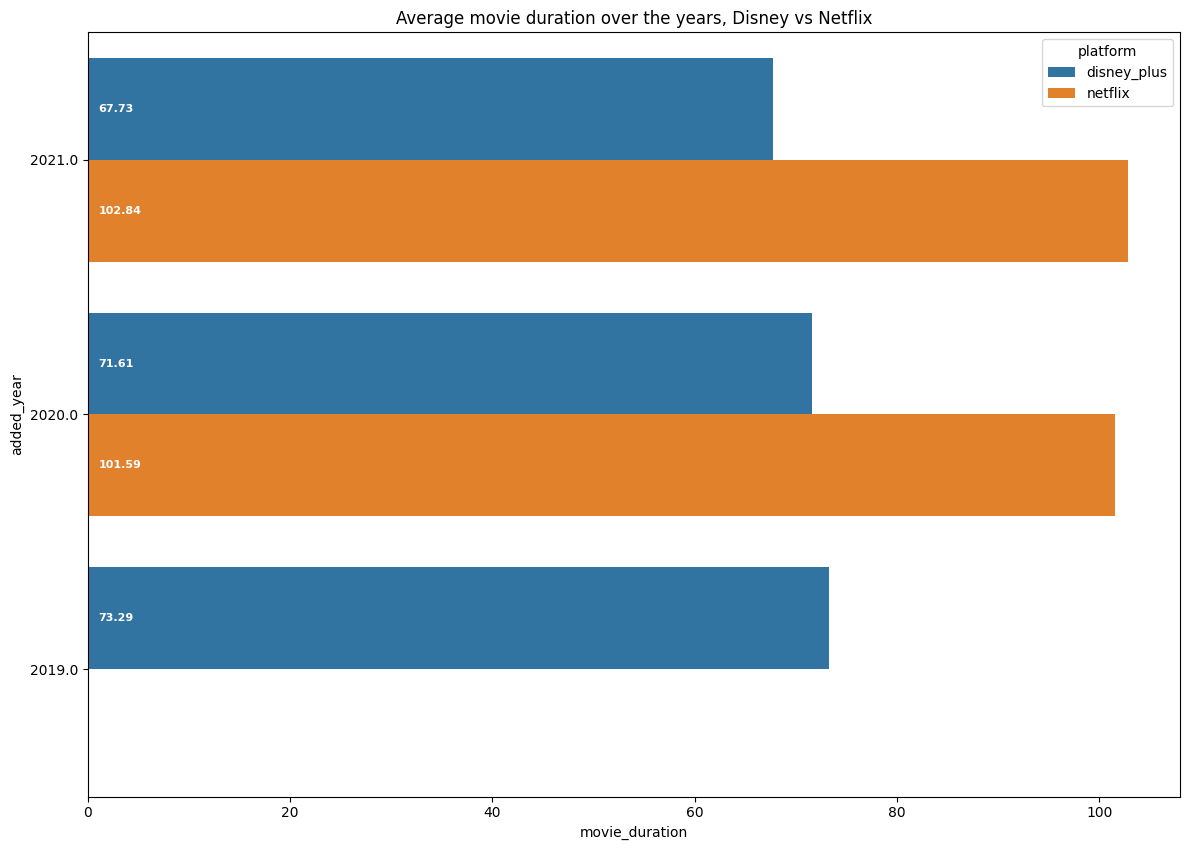

In [14]:
def movie_duration_analysis():

    data = sqldf(
        f"""
SELECT added_year
     , platform
     , AVG(movie_duration) AS movie_duration
  FROM listings
 WHERE type = 'Movie'
   AND platform IN ('disney_plus', 'netflix')
 GROUP BY 1, 2
 ORDER BY 1 DESC
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="added_year",
        value_name="movie_duration",
        sort=False,
        sort_desc=True,
        limit=5,
        show_values=True,
        grouping_label="platform",
        title=f"Average movie duration over the years, Disney vs Netflix",
        max_value_axis=None,
    )


movie_duration_analysis()


In [16]:
def tv_show_seasons_analysis(platform: str):

    data = sqldf(
        f"""
SELECT tv_series_seasons AS seasons
     , COUNT(1) AS total
  FROM listings
 WHERE type = 'TV Show'
   AND platform = '{platform}'
   AND tv_series_seasons IS NOT NULL
 GROUP BY 1
 ORDER BY 1 DESC
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="seasons",
        value_name="total",
        sort=True,
        sort_desc=True,
        limit=100,
        show_values=True,
        grouping_label=None,
        title=f"Number of {platform} TV shows by number of seasons over all time",
        max_value_axis=None,
    )

    pie_chart(
        data=data,
        label_name="seasons",
        value_name="total",
        title=f"Number of {platform} TV shows by number of seasons over all time",
    )


ipywidgets.interact(
    tv_show_seasons_analysis, 
    platform=["netflix", "amazon_prime", "disney_plus"],
)

# ipywidgets.interact(
#     netflix_listings_by_year_added,
#     type=["Movie", "TV Show"],
# )

interactive(children=(Dropdown(description='platform', options=('netflix', 'amazon_prime', 'disney_plus'), val…

<function __main__.tv_show_seasons_analysis(platform: str)>

# Netflix Directors and Casts Analysis

In [21]:
def top_producing_directors(type: str, year: int, top_n: int):

    data = sqldf(
        f"""
WITH
    
    top AS (
        SELECT director
             , COUNT(1) AS total
          FROM listing_directors ld
          LEFT JOIN listings l ON ld.listing_id = l.listing_id
         WHERE l.platform = 'netflix'
           AND l.type = '{type}'
           AND l.added_year = {year}
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT {top_n}
    )

SELECT * FROM top
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="director",
        value_name="total",
        sort=True,
        sort_desc=True,
        title=f"Top {top_n} highest producing directors",
        limit=100,
        show_values=True,
        grouping_label=None,
        max_value_axis=None,
    )

def top_producing_casts(type: str, year: int, top_n: int):

    data = sqldf(
        f"""
WITH
    
    top AS (
        SELECT "cast"
             , COUNT(1) AS total
          FROM listing_casts lc
          LEFT JOIN listings l ON lc.listing_id = l.listing_id
         WHERE l.platform = 'netflix'
           AND l.type = '{type}'
           AND l.added_year = {year}
         GROUP BY 1
         ORDER BY 2 DESC
         LIMIT {top_n}
    )

SELECT * FROM top
        """
    )

    bar_chart_horizontal(
        data=data,
        label_name="cast",
        value_name="total",
        sort=True,
        sort_desc=True,
        title=f"Top {top_n} highest producing casts",
        limit=100,
        show_values=True,
        grouping_label=None,
        max_value_axis=None,
    )

ipywidgets.interact(
    top_producing_directors,
    type=["Movie", "TV Show"],
    year=(2016, 2021, 1),
    top_n=(1, 7, 1),
)

ipywidgets.interact(
    top_producing_casts,
    type=["Movie", "TV Show"],
    year=(2016, 2021, 1),
    top_n=(1, 7, 1),
)

interactive(children=(Dropdown(description='type', options=('Movie', 'TV Show'), value='Movie'), IntSlider(val…

interactive(children=(Dropdown(description='type', options=('Movie', 'TV Show'), value='Movie'), IntSlider(val…

<function __main__.top_producing_casts(type: str, year: int, top_n: int)>

# Movie Content Analysis (Word Cloud)

In [22]:
def movie_content_analysis(platform: str, year: str, category: str):
    
    data = sqldf(
        f"""
SELECT description
  FROM listings
 WHERE platform = '{platform}'
   AND type = 'Movie'
   AND added_year = {year}
   AND listing_id IN (SELECT listing_id FROM listing_categories WHERE category = '{category}')
        """
    )

    word_cloud_chart(
        data=data,
        text_column="description",
        title=f"Word Cloud Chart for {platform} in {year}, category = '{category}'",
    )

ipywidgets.interact(
    movie_content_analysis,
    platform=["netflix", "amazon_prime", "disney_plus"],
    year=(2016, 2021, 1),
    category=["Dramas", "Comedies", "Romantic Movies"],
)

interactive(children=(Dropdown(description='platform', options=('netflix', 'amazon_prime', 'disney_plus'), val…

<function __main__.movie_content_analysis(platform: str, year: str, category: str)>